# Multilayer Perceptron

In [48]:
import numpy as np
import torch
from torchvision import datasets
from torch.utils.data import DataLoader as DL 
from torchvision import transforms as T
from mlp import mlp
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [9]:
# settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
lr = 0.01
layers = [28*28, 64, 10]
epochs = 10

In [3]:
# load data
train_data = datasets.MNIST('D:/Code/Datasets', transform=T.ToTensor(), train=True)
test_data = datasets.MNIST('D:/Code/Datasets', transform=T.ToTensor(), train=False)

In [4]:
# dataloader
x_train = DL(train_data, shuffle=True, batch_size=batch_size)
x_test = DL(test_data, shuffle=False, batch_size=batch_size)

In [40]:
# model
model = mlp(layers).to(device)
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

In [17]:
# loss and accuracy
@torch.no_grad()
def Loss(model, data):
    cost = 0.
    for idx, (x,t) in enumerate(data):
        model.eval()
        x = x.view(-1,28*28).to(device)
        t = t.to(device)
        logits = model(x)
        loss = F.cross_entropy(logits, t)
        cost+=loss
    return cost.item()/(idx+1)

@torch.no_grad()
def Accuracy(model, data):
    num_corrects, num_data = 0,0
    for idx, (x,t) in enumerate(data):
        model.eval()
        x = x.view(-1,28*28).to(device)
        t = t.to(device)
        logits = model(x)
        y = torch.argmax(logits,1)
        num_corrects += (y==t).sum().item()
        num_data += t.size(0)
    return num_corrects/num_data

In [45]:
# training
def train(model, epochs):
    train_loss = []
    train_acc = []
    for e in range(epochs):
        for idx, (x,t) in enumerate(x_train):
            model.train()
            # forward
            x = x.view(-1,28*28).to(device)
            t = t.to(device)
            logits = model(x)
            # loss
            loss = F.cross_entropy(logits, t)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # training loss and accuracy
        cost = Loss(model, x_train)
        train_loss.append(cost)
        accuracy = Accuracy(model, x_train)
        train_acc.append(accuracy)
        print('epoch {}, training loss: {}, training accuracy: {}'.format(e+1,cost,accuracy))
    return train_loss, train_acc

In [46]:
results = train(model,epochs)

epoch 1, training loss: 0.36993528581631463, training accuracy: 0.8975666666666666
epoch 2, training loss: 0.340611537128115, training accuracy: 0.9041166666666667
epoch 3, training loss: 0.32139447502998403, training accuracy: 0.90905
epoch 4, training loss: 0.3070168566347948, training accuracy: 0.91205
epoch 5, training loss: 0.29294063999200426, training accuracy: 0.9167666666666666
epoch 6, training loss: 0.2825873076026119, training accuracy: 0.91935
epoch 7, training loss: 0.2733038473230944, training accuracy: 0.9221166666666667
epoch 8, training loss: 0.26454172358075695, training accuracy: 0.9249166666666667
epoch 9, training loss: 0.25514644142915444, training accuracy: 0.9279666666666667
epoch 10, training loss: 0.24631308289224912, training accuracy: 0.9301166666666667


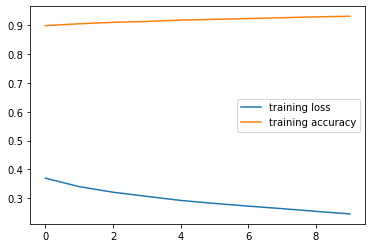

In [49]:
plt.plot(results[0], label='training loss')
plt.plot(results[1], label='training accuracy')
plt.legend()
plt.show()

In [50]:
print('test accuracy: ', Accuracy(model, x_test))

test accuracy:  0.9319
